This is the Jupyter notebook for team F. We are using a comprehensive dataset of 1500 patients diagnosed with Obsessive Compulsive Disorder (OCD). This dataset is available on Kaggle.  
  
Reference:   
Haque O, Alamgir Z. OCD Patient Dataset: Demographics and Clinical Data [Internet]. 2023 [cited 2024-09-08]. Available from: https://www.kaggle.com/datasets/ohinhaque/ocd-patient-dataset-demographics-and-clinical-data/data

The dataset looks as follows:

In [1]:
# read dataset
import pandas as pd
df = pd.read_csv("ocd_patient_dataset.csv")
df.head()

,Patient ID,Age,Gender,Ethnicity,Marital Status,Education Level,OCD Diagnosis Date,Duration of Symptoms (months),Previous Diagnoses,Family History of OCD,Obsession Type,Compulsion Type,Y-BOCS Score (Obsessions),Y-BOCS Score (Compulsions),Depression Diagnosis,Anxiety Diagnosis,Medications
0,1018,32,Female,African,Single,Some College,2016-07-15,203,MDD,No,Harm-related,Checking,17,10,Yes,Yes,SNRI
1,2406,69,Male,African,Divorced,Some College,2017-04-28,180,NaN,Yes,Harm-related,Washing,21,25,Yes,Yes,SSRI
2,1188,57,Male,Hispanic,Divorced,College Degree,2018-02-02,173,MDD,No,Contamination,Checking,3,4,No,No,Benzodiazepine
3,6200,27,Female,Hispanic,Married,College Degree,2014-08-25,126,PTSD,Yes,Symmetry,Washing,14,28,Yes,Yes,SSRI
4,5824,56,Female,Hispanic,Married,High School,2022-02-20,168,PTSD,Yes,Hoarding,Ordering,39,18,No,No,NaN


The dataset includes demographic information such as patient id age, gender, ethnicity, marital status and education level; along with clinical details like OCD diagnosis date, symptom duration, past history of psychiatric diagnosis, and family history of OCD. Moreover, symptom severity is assessed through the Yale-Brown Obsessive Compulsive Scale (Y-BOCS) for obsessive and compulsive symptom types. Furthermore, there is record of other mental health conditions such as anxiety and depression, and the medications prescribed to the patients.  
  
Reference:  
Goodman WK, Lawrence HP, Rasmussen SA, Mazure C, Fleischmann RL, Hill CL, et al. The Yale-Brown Obsessive Compulsive Scale. Arch Gen Psychiatry. 1989;46:1006-11

Over the next few sections, the following tasks have been carried out:  
1. The variable datatypes have been checked  
2. The variables that had "yes" or "no answers were converted to Boolean  
3. The missing values have been taken care of.  


In [2]:
# display variable datatypes
df.dtypes

Patient ID                        int64
Age                               int64
Gender                           object
Ethnicity                        object
Marital Status                   object
Education Level                  object
OCD Diagnosis Date               object
Duration of Symptoms (months)     int64
Previous Diagnoses               object
Family History of OCD            object
Obsession Type                   object
Compulsion Type                  object
Y-BOCS Score (Obsessions)         int64
Y-BOCS Score (Compulsions)        int64
Depression Diagnosis             object
Anxiety Diagnosis                object
Medications                      object
dtype: object

In [3]:
# convert to boolean
df = pd.read_csv("ocd_patient_dataset.csv", true_values =["Yes"], false_values=["No"])
df.head()
df.dtypes

Patient ID                        int64
Age                               int64
Gender                           object
Ethnicity                        object
Marital Status                   object
Education Level                  object
OCD Diagnosis Date               object
Duration of Symptoms (months)     int64
Previous Diagnoses               object
Family History of OCD              bool
Obsession Type                   object
Compulsion Type                  object
Y-BOCS Score (Obsessions)         int64
Y-BOCS Score (Compulsions)        int64
Depression Diagnosis               bool
Anxiety Diagnosis                  bool
Medications                      object
dtype: object

In [4]:
# missing values
df.isnull().sum()

Patient ID                         0
Age                                0
Gender                             0
Ethnicity                          0
Marital Status                     0
Education Level                    0
OCD Diagnosis Date                 0
Duration of Symptoms (months)      0
Previous Diagnoses               248
Family History of OCD              0
Obsession Type                     0
Compulsion Type                    0
Y-BOCS Score (Obsessions)          0
Y-BOCS Score (Compulsions)         0
Depression Diagnosis               0
Anxiety Diagnosis                  0
Medications                      386
dtype: int64

In [5]:
# 'Previous Diagnoses' and 'Medications' have missing values, however we have assumed that it implies that the patient does not have a diagnosis or is not taking any medication respectively.
# Therefore filling missing values with the word None
df['Previous Diagnoses'] = df['Previous Diagnoses'].fillna('None')
df['Medications'] = df['Medications'].fillna('None')
df.isnull().sum()

Patient ID                       0
Age                              0
Gender                           0
Ethnicity                        0
Marital Status                   0
Education Level                  0
OCD Diagnosis Date               0
Duration of Symptoms (months)    0
Previous Diagnoses               0
Family History of OCD            0
Obsession Type                   0
Compulsion Type                  0
Y-BOCS Score (Obsessions)        0
Y-BOCS Score (Compulsions)       0
Depression Diagnosis             0
Anxiety Diagnosis                0
Medications                      0
dtype: int64

The Y-BOCS scale is a standardized clinical assessment tool designed to evaluate the severity and type of symptoms in individuals with OCD. There are 10 items: 5 for grading Obsession and 5 for grading compulsion and each can be scored from 0-4. Thus, scores for obsession and compulsion range from 0-20 each, and the total score ranges from 0-40. The dataset did not have the total score calculated which we have done below by adding the scores for Y-BOCS Score (Obsessions) and Y-BOCS Score (Compulsions).

In [6]:
# calculate total score
df['Total_Score'] = df['Y-BOCS Score (Obsessions)'] + df['Y-BOCS Score (Compulsions)']

We realised that there were instances in our dataset that had total score above 40, and individual scores for Obsessions and Compulsions above 20 each, which is not acceptable based on the scoring system of the scale. Hence, we have eliminated those.

In [7]:
# count above 40 for Total_Score
count_above_40 = (df['Total_Score'] > 40).sum()
print(f'Number of values above 40: {count_above_40}')

# count above 20 for Y-BOCS Score (Obsessions)
count_above_20_O = (df['Y-BOCS Score (Obsessions)'] > 20).sum()
print(f'Number of values above 20: {count_above_20_O}')

# count above 20 for Y-BOCS Score (Compulsions)
count_above_20_C = (df['Y-BOCS Score (Compulsions)'] > 20).sum()
print(f'Number of values above 20: {count_above_20_C}')



Number of values above 40: 720
Number of values above 20: 717
Number of values above 20: 722


In [8]:
# creating a dataframe with valid scores
filtered_df = df[
    (df['Y-BOCS Score (Obsessions)'] <= 20) &
    (df['Y-BOCS Score (Compulsions)'] <= 20) &
    (df['Total_Score'] <= 40)
]
filtered_df

,Patient ID,Age,Gender,Ethnicity,Marital Status,Education Level,OCD Diagnosis Date,Duration of Symptoms (months),Previous Diagnoses,Family History of OCD,Obsession Type,Compulsion Type,Y-BOCS Score (Obsessions),Y-BOCS Score (Compulsions),Depression Diagnosis,Anxiety Diagnosis,Medications,Total_Score
0,1018,32,Female,African,Single,Some College,2016-07-15,203,MDD,False,Harm-related,Checking,17,10,True,True,SNRI,27
2,1188,57,Male,Hispanic,Divorced,College Degree,2018-02-02,173,MDD,False,Contamination,Checking,3,4,False,False,Benzodiazepine,7
6,9861,38,Female,Hispanic,Single,College Degree,2017-03-13,110,MDD,False,Contamination,Praying,12,16,True,False,SNRI,28
11,7905,73,Female,Hispanic,Divorced,High School,2017-01-13,233,GAD,False,Religious,Counting,4,16,True,True,Benzodiazepine,20
19,2637,66,Female,Asian,Divorced,College Degree,2018-08-14,73,Panic Disorder,False,Harm-related,Washing,0,12,False,True,SNRI,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1484,9561,24,Female,Asian,Married,Some College,2018-01-08,95,Panic Disorder,True,Contamination,Praying,15,9,False,True,None,24
1485,3419,62,Female,African,Single,College Degree,2020-12-11,162,Panic Disorder,False,Hoarding,Checking,20,15,False,True,SNRI,35
1493,1819,58,Female,Hispanic,Divorced,Some College,2016-07-07,22,None,True,Contamination,Praying,10,1,False,True,SNRI,11
1497,6089,40,Male,Asian,Married,Some College,2018-03-13,100,None,True,Contamination,Counting,2,15,True,True,Benzodiazepine,17


Saving the filtered dataframe in a csv

In [9]:
filtered_df.to_csv('filtered_df.csv', index=False)

We were interested in predicting the severity of OCD given by "Total_Score", and based on a literature review found that age, duration of symptoms, family history of OCD, and diagnosis of Anxiety or Depression affect it. Gender being a basic demographic feature has been retained though research does not clearly indicate its influence on OCD. Obsession Type and Compulsion Type are a reflection of patient's symptoms which may affect severity of the disorder, and therefore have been retained.  

References:  
1. Mathes BM, Morabito DM, Schmidt NB. Epidemiological and Clinical Gender Differences in OCD. Curr Psychiatry Rep. 2019 Apr 23;21(5):36. doi: 10.1007/s11920-019-1015-2.
2. Riddle DB, Guzick A, Minhajuddin A, Smárason O, Armstrong GM, Slater H, et al. Obsessive-compulsive disorder in youth and young adults with depression: Clinical characteristics of comorbid presentations. J Obsessive Compuls Relat Disord. 2023 Jul;38:100820. doi: 10.1016/j.jocrd.2023.100820. 
3. Zheng H, Zhang Z, Huang C, Luo G. Medical status of outpatients with obsessive-compulsive disorder in psychiatric department and its influencing factors. Zhong Nan Da Xue Xue Bao Yi Xue Ban. 2022 Oct 28;47(10):1418-1424. English, Chinese. doi: 10.11817/j.issn.1672-7347.2022.220125. 
4. Mahjani B, Bey K, Boberg J, Burton C. Genetics of obsessive-compulsive disorder. Psychol Med. 2021 Oct;51(13):2247-2259. doi: 10.1017/S0033291721001744. Epub 2021 May 25. PMID: 34030745; PMCID: PMC8477226.
5. Mathes BM, Morabito DM, Schmidt NB. Epidemiological and Clinical Gender Differences in OCD. Curr Psychiatry Rep. 2019 Apr 23;21(5):36. doi: 10.1007/s11920-019-1015-2. PMID: 31016410.

With the goal of predicting OCD severity, it was necessary to label the Total_Score for classification task. We tried to  identify the distribution of scores across bins of 5 from 0-40 in order to define score categories.

In [10]:
# Define bin ranges (0 to 40 with bins of size 5)
bins = range(0, 45, 5)  # This creates bins from 0-5, 6-10, ..., 36-40

# Use pd.cut to categorize the Total_Score into bins
filtered_df['Score_Bins'] = pd.cut(df['Total_Score'], bins=bins, right=False)

# Calculate the count for each bin
bin_counts = filtered_df['Score_Bins'].value_counts().sort_index()

# Display the bin counts
print(bin_counts)

Score_Bins
[0, 5)       11
[5, 10)      50
[10, 15)     61
[15, 20)     70
[20, 25)    102
[25, 30)     61
[30, 35)     35
[35, 40)     28
Name: count, dtype: int64


C:\Users\shwet\AppData\Local\Temp\ipykernel_35864\4113541483.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Score_Bins'] = pd.cut(df['Total_Score'], bins=bins, right=False)


Based on the distribution above, we have decided to categorise Total_Score as follows:  
0-20: Low
21-40: High

In [11]:
# Categorize Total_Score into 'Low' and 'High' based on the given range
filtered_df['Score_Category'] = pd.cut(filtered_df['Total_Score'], 
                              bins=[0, 20, 40], 
                              labels=['Low', 'High'], 
                              include_lowest=True)

#  View a concise dataframe based on the feature selection
filtered_df = filtered_df[["Age", "Gender", "Family History of OCD", "Duration of Symptoms (months)", "Obsession Type", "Compulsion Type", "Total_Score", "Depression Diagnosis", "Anxiety Diagnosis", "Score_Category"]]
filtered_df.head()

C:\Users\shwet\AppData\Local\Temp\ipykernel_35864\1325466603.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Score_Category'] = pd.cut(filtered_df['Total_Score'],


,Age,Gender,Family History of OCD,Duration of Symptoms (months),Obsession Type,Compulsion Type,Total_Score,Depression Diagnosis,Anxiety Diagnosis,Score_Category
0,32,Female,False,203,Harm-related,Checking,27,True,True,High
2,57,Male,False,173,Contamination,Checking,7,False,False,Low
6,38,Female,False,110,Contamination,Praying,28,True,False,High
11,73,Female,False,233,Religious,Counting,20,True,True,Low
19,66,Female,False,73,Harm-related,Washing,12,False,True,Low


### Descriptive Analytics  
In this section, we have tried to analyse if the literature review results hold true for our dataset.

In [12]:
import plotly.express as px
import plotly.graph_objects as go

We tried to evaluate if our data is equally distributed for age and gender which are important demographic features and Score_Category which will be the task.

In [13]:
# Checking if the data is equally distributed for age and gender
# Creating age groups (bins)
filtered_df['Age Group'] = pd.cut(filtered_df['Age'], bins=[0, 18, 30, 50, 70, 100], 
                         labels=['0-18', '19-30', '31-50', '51-70', '71+'])

# Count the number of males and females in each age group
gender_age_group = filtered_df.groupby(['Age Group', 'Gender']).size().unstack().fillna(0)

# Create a figure
fig0 = go.Figure()

# Add bar plot for males
fig0.add_trace(
    go.Bar(
        x=gender_age_group.index,
        y=gender_age_group['Male'],
        name='Male',
        marker_color='blue'
    )
)

# Add bar plot for females
fig0.add_trace(
    go.Bar(
        x=gender_age_group.index,
        y=gender_age_group['Female'],
        name='Female',
        marker_color='pink'
    )
)

# Update layout to create stacked bars
fig0.update_layout(
    barmode='stack',  # Stacked bar mode
    title='Number of People by Age Group and Gender',
    xaxis_title='Age Group',
    yaxis_title='Number of People',
    legend_title='Gender',
    xaxis_tickangle=0,
    yaxis=dict(showgrid=True)
)

# Show the plot
fig0.show()

C:\Users\shwet\AppData\Local\Temp\ipykernel_35864\2842059404.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Age Group'] = pd.cut(filtered_df['Age'], bins=[0, 18, 30, 50, 70, 100],
C:\Users\shwet\AppData\Local\Temp\ipykernel_35864\2842059404.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_age_group = filtered_df.groupby(['Age Group', 'Gender']).size().unstack().fillna(0)


In [14]:
# Count the instances for each Score_Category
score_category_counts = filtered_df['Score_Category'].value_counts()

# Create a bar plot using Plotly to visualize the counts of 'Low' and 'High'
fig00 = px.bar(x=score_category_counts.index, 
             y=score_category_counts.values, 
             labels={'x': 'Score Category', 'y': 'Count of Instances'}, 
             title='Count of Instances in Low and High Score Categories',
             text=score_category_counts.values)  # Display counts on bars

# Customize the layout
fig00.update_layout(xaxis_title='Score Category', 
                  yaxis_title='Number of Instances',
                  showlegend=False)

# Show the figure
fig00.show()

1. What is the distribution of OCD severity (Total_Score) across different age groups?  
This question helps to determine if certain age groups tend to experience more severe OCD symptoms. It might reveal whether younger or older people are more affected.  
The age has been split into age groups and we have tried to evaluate how our dataset is represented across the various age bins.

In [15]:
# Box plot to show distribution
fig = px.box(filtered_df, x='Age Group', y='Total_Score', title='Distribution of OCD Severity Across Age Groups',
             labels={'Age Group': 'Age Group', 'Total_Score': 'OCD Severity (Y-BOCS Total Score)'},
             category_orders={'Age Group': ['0-18', '19-30', '31-50', '51-70', '71+']})  # Ensure proper order

fig.show()

2. Is there a significant difference in OCD severity based on gender?  
Literature does not clearly indicate a relation between gender and OCD. Gender-based analysis can uncover any significant differences between males and females in terms of OCD severity. This could help in targeting gender-specific interventions.

In [16]:
# checking for gender distribution in the dataset
gender_counts = filtered_df['Gender'].value_counts()
print(gender_counts)

fig2 = px.bar(gender_counts, 
             x=gender_counts.index, 
             y=gender_counts.values, 
             title='Gender Distribution',
             labels={'x': 'Gender', 'y': 'Count'},
             color=gender_counts.index)

# Show the figure
fig2.show()

Gender
Female    224
Male      195
Name: count, dtype: int64


In [17]:
# Box plot for OCD severity (Total_Score) by Gender
fig3 = px.box(df, x='Gender', y='Total_Score', title='Distribution of OCD Severity by Gender',
              labels={'Total_Score': 'OCD Severity (Y-BOCS Total Score)', 'Gender': 'Gender'})
fig3.show()

3. How does family history of OCD influence the Total_Score?  
We try to examine whether individuals with a family history of OCD are more likely to have severe symptoms, potentially highlighting genetic or environmental influences.

In [18]:
import plotly.io as pio

In [19]:
# Count the number of people with and without family history of OCD
family_history_counts = filtered_df['Family History of OCD'].value_counts()

# Create a bar plot for the number of people with and without family history of OCD
bar_trace = go.Bar(
    x=family_history_counts.index, 
    y=family_history_counts.values, 
    name='Number of People',
    yaxis='y1',
    marker_color='lightblue'
)

# Create a box plot for the distribution of Total_Score for each category
box_trace = go.Box(
    x=filtered_df['Family History of OCD'], 
    y=filtered_df['Total_Score'], 
    name='Distribution of Total Score',
    yaxis='y2',
    marker_color='orange'
)

# Combine the bar and box plot using secondary y-axes
fig4 = go.Figure(data=[bar_trace, box_trace])

# Update layout for dual y-axes
fig4.update_layout(
    title='Number of People with Family History of OCD and Distribution of Their Scores',
    xaxis_title='Family History of OCD',
    yaxis=dict(
        title='Number of People',
        showgrid=False
    ),
    yaxis2=dict(
        title='Distribution of Total Score',
        overlaying='y',  # Overlay on the same plot
        side='right'
    ),
    legend=dict(x=0.1, y=1.1)
)

# Show the figure
fig4.show()

4. How does diagnosis of Anxiety or Depression affect Total_Score?

In [20]:
# Add a 'Condition' column for easy visualization
filtered_df['Condition'] = filtered_df.apply(lambda row: 
                            'Anxiety T, Depression T' if row['Anxiety Diagnosis'] and row['Depression Diagnosis'] else
                            'Anxiety T, Depression F' if row['Anxiety Diagnosis'] and not row['Depression Diagnosis'] else
                            'Anxiety F, Depression T' if not row['Anxiety Diagnosis'] and row['Depression Diagnosis'] else
                            'Anxiety F, Depression F', axis=1)

# Create a boxplot to visualize the total score distribution across different conditions using Plotly
fig6 = px.box(filtered_df, 
             x='Condition', 
             y='Total_Score', 
             title='Total Score Distribution by Anxiety and Depression Conditions',
             labels={'Condition': 'Anxiety and Depression Conditions', 'Total_Score': 'Total Score'},
             category_orders={'Condition': ['Anxiety T, Depression T', 'Anxiety T, Depression F', 
                                            'Anxiety F, Depression T', 'Anxiety F, Depression F']}
            )

# Update layout to rotate the x-axis labels and add gridlines
fig6.update_layout(
    xaxis_title='Condition',
    yaxis_title='Total Score',
    xaxis_tickangle=45,
    yaxis=dict(showgrid=True)
)

# Show the plot
fig6.show()

C:\Users\shwet\AppData\Local\Temp\ipykernel_35864\2529381889.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



5. Are the Obsession types represented equally in this dataset? What is the average Total_Score for each type?

In [21]:
# Count the number of instances for each obsession type
obsession_counts = filtered_df['Obsession Type'].value_counts()

# Calculate the average Total Score for each obsession type
obsession_avg_scores = filtered_df.groupby('Obsession Type')['Total_Score'].mean()

# Create a figure
fig7 = go.Figure()

# Add bar plot for the number of instances (left y-axis)
fig7.add_trace(
    go.Bar(
        x=obsession_counts.index,
        y=obsession_counts.values,
        name='Number of Instances',
        marker_color='lightblue',
        text=obsession_counts.values,  # Show count on the bars
        textposition='auto'
    )
)

# Add line plot for the average total score (right y-axis)
fig7.add_trace(
    go.Scatter(
        x=obsession_avg_scores.index,
        y=obsession_avg_scores.values,
        name='Average Total Score',
        yaxis='y2',  # Associate this with the second y-axis
        mode='lines+markers',
        line=dict(color='orange', width=3),
        marker=dict(size=8),
        text=obsession_avg_scores.values,  # Show average scores on the points
        textposition='top center'
    )
)

# Update layout to include a second y-axis
fig7.update_layout(
    title='Number of Instances and Average Total Score by Obsession Type',
    xaxis_title='Obsession Type',
    yaxis_title='Number of Instances',
    yaxis2=dict(
        title='Average Total Score',
        overlaying='y',  # Overlay y-axis 2 on the same plot as y-axis 1
        side='right'
    ),
    legend=dict(x=0.1, y=1.1),
    xaxis_tickangle=45,
    yaxis=dict(showgrid=True)
)

# Show the plot
fig7.show()

6. Are the Compulsion types represented equally in this dataset? What is the average Total_Score for each type?

In [22]:
# Count the number of instances for each compulsion type
compulsion_counts = filtered_df['Compulsion Type'].value_counts()

# Calculate the average Total Score for each compulsion type
compulsion_avg_scores = filtered_df.groupby('Compulsion Type')['Total_Score'].mean()

# Create a figure
fig8 = go.Figure()

# Add bar plot for the number of instances (left y-axis)
fig8.add_trace(
    go.Bar(
        x=compulsion_counts.index,
        y=compulsion_counts.values,
        name='Number of Instances',
        marker_color='lightblue',
        text=compulsion_counts.values,  # Show count on the bars
        textposition='auto'
    )
)

# Add line plot for the average total score (right y-axis)
fig8.add_trace(
    go.Scatter(
        x=compulsion_avg_scores.index,
        y=compulsion_avg_scores.values,
        name='Average Total Score',
        yaxis='y2',  # Associate this with the second y-axis
        mode='lines+markers',
        line=dict(color='orange', width=3),
        marker=dict(size=8),
        text=compulsion_avg_scores.values,  # Show average scores on the points
        textposition='top center'
    )
)

# Update layout to include a second y-axis
fig8.update_layout(
    title='Number of Instances and Average Total Score by Compulsion Type',
    xaxis_title='Compulsion Type',
    yaxis_title='Number of Instances',
    yaxis2=dict(
        title='Average Total Score',
        overlaying='y',  # Overlay y-axis 2 on the same plot as y-axis 1
        side='right'
    ),
    legend=dict(x=0.1, y=1.1),
    xaxis_tickangle=45,
    yaxis=dict(showgrid=True)
)

# Show the plot
fig8.show()

To prepare the dataframe for diagnosis and prediction, over the next few codes, the following has been done:
1. Conversion of boolean values to integers
2. Normalisation of numerical features
3. Conversion of categorical features to numerical by one hot encoding
4. Using Label encoding on Score_Category

In [23]:
# Convert boolean values to integers (0 for False, 1 for True) for Family history of OCD
filtered_df['Family History of OCD'] = filtered_df['Family History of OCD'].astype(int)


# Convert boolean values to integers (0 for False, 1 for True) for Depression Diagnosis
filtered_df['Depression Diagnosis'] = filtered_df['Depression Diagnosis'].astype(int)

# Convert boolean values to integers (0 for False, 1 for True) for Anxiety Diagnosis
filtered_df['Anxiety Diagnosis'] = filtered_df['Anxiety Diagnosis'].astype(int)

# Convert Gender to Boolean: Male as True, Female as False
filtered_df['Gender_Boolean'] = filtered_df['Gender'].map({'Male': True, 'Female': False})

# Convert Boolean to Integers (True -> 1, False -> 0)
filtered_df['Gender_Boolean'] = filtered_df['Gender_Boolean'].astype(int)

C:\Users\shwet\AppData\Local\Temp\ipykernel_35864\3589368649.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\shwet\AppData\Local\Temp\ipykernel_35864\3589368649.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\shwet\AppData\Local\Temp\ipykernel_35864\3589368649.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

In [24]:
# Normalisation of numerical features
from sklearn.preprocessing import MinMaxScaler

# Initialize Min-Max Scaler
scaler = MinMaxScaler()

# Select the columns you want to normalize
columns_to_normalize = ['Age', 'Duration of Symptoms (months)']

# Apply the Min-Max scaling
filtered_df[columns_to_normalize] = scaler.fit_transform(filtered_df[columns_to_normalize])

C:\Users\shwet\AppData\Local\Temp\ipykernel_35864\178548370.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [25]:
# One ot encoding for Obsession Type and Compulsion Type

from sklearn.preprocessing import OneHotEncoder

# Initialize OneHotEncoder with sparse_output=False to return dense array
encoder = OneHotEncoder(sparse_output=False)

# Apply One-Hot Encoding to the 'Obsession Type' column
one_hot_encoded = encoder.fit_transform(filtered_df[["Obsession Type"]])

# Get the feature names for the encoded columns
encoded_feature_names = encoder.get_feature_names_out(["Obsession Type"])

# Convert the encoded data into a DataFrame
df_one_hot_O = pd.DataFrame(one_hot_encoded, columns=encoded_feature_names)

# Reset the index to avoid row misalignment during concatenation
df_one_hot_O.reset_index(drop=True, inplace=True)

# Concatenate the original dataframe with the new one-hot encoded columns
filtered_df.reset_index(drop=True, inplace=True)  # Reset index in original dataframe too
filtered_df = pd.concat([filtered_df, df_one_hot_O], axis=1)

# Drop the original 'Obsession Type' column if you no longer need it
filtered_df.drop(columns=['Obsession Type'], inplace=True)

# Apply One-Hot Encoding to the 'Compulsion Type' column
one_hot_encoded = encoder.fit_transform(filtered_df[["Compulsion Type"]])

# Get the feature names for the encoded columns
encoded_feature_names = encoder.get_feature_names_out(["Compulsion Type"])

# Convert the encoded data into a DataFrame
df_one_hot_C = pd.DataFrame(one_hot_encoded, columns=encoded_feature_names)

# Reset the index to avoid row misalignment during concatenation
df_one_hot_C.reset_index(drop=True, inplace=True)

# Concatenate the original dataframe with the new one-hot encoded columns
filtered_df.reset_index(drop=True, inplace=True)  # Reset index in original dataframe too
filtered_df = pd.concat([filtered_df, df_one_hot_C], axis=1)

# Drop the original 'Compulsion Type' column if you no longer need it
filtered_df.drop(columns=['Compulsion Type'], inplace=True)


In [26]:
# Using Label Encoding on Score_Category
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply the label encoder to the 'Score_Category' column
filtered_df['Score_Category_Encoded'] = label_encoder.fit_transform(filtered_df['Score_Category'])

In [27]:
# Display the updated dataframe
filtered_df.head()

,Age,Gender,Family History of OCD,Duration of Symptoms (months),Total_Score,Depression Diagnosis,Anxiety Diagnosis,Score_Category,Age Group,Condition,...,Obsession Type_Harm-related,Obsession Type_Hoarding,Obsession Type_Religious,Obsession Type_Symmetry,Compulsion Type_Checking,Compulsion Type_Counting,Compulsion Type_Ordering,Compulsion Type_Praying,Compulsion Type_Washing,Score_Category_Encoded
0,0.245614,Female,0,0.841880,27,1,1,High,31-50,"Anxiety T, Depression T",...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
1,0.684211,Male,0,0.713675,7,0,0,Low,51-70,"Anxiety F, Depression F",...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
2,0.350877,Female,0,0.444444,28,1,0,High,31-50,"Anxiety F, Depression T",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
3,0.964912,Female,0,0.970085,20,1,1,Low,71+,"Anxiety T, Depression T",...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1
4,0.842105,Female,0,0.286325,12,0,1,Low,51-70,"Anxiety T, Depression F",...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1


### Diagnostic Analytics

1. Can we cluster patients based on their symptom severity, anxiety, and depression diagnoses?

In [28]:
from sklearn.cluster import KMeans

# Select the features for clustering
clustering_features = filtered_df[['Anxiety Diagnosis', 'Depression Diagnosis', 'Score_Category_Encoded']]

# Initialize and apply K-Means clustering (3 clusters)
kmeans = KMeans(n_clusters=3, random_state=42)
filtered_df['Cluster'] = kmeans.fit_predict(clustering_features)

# Visualize the clusters
fig = px.scatter_3d(
    filtered_df, x='Anxiety Diagnosis', y='Depression Diagnosis', z='Score_Category_Encoded', 
    color='Cluster', title='Patient Clusters based on Symptom Severity, Anxiety, and Depression',
    labels={'Anxiety Diagnosis': 'Anxiety Diagnosis', 'Depression Diagnosis': 'Depression Diagnosis', 
            'Score_Category_Encoded': 'Symptom Severity (Encoded)', 'Cluster': 'Cluster'}
)

fig.show()

# To analyze the cluster centers
print("Cluster Centers:")
print(kmeans.cluster_centers_)

Cluster Centers:
[[3.00492611e-01 2.26600985e-01 7.63546798e-01]
 [6.07843137e-01 6.79738562e-01 4.44089210e-16]
 [1.00000000e+00 1.00000000e+00 1.00000000e+00]]


Cluster 0:  
Anxiety Diagnosis: 0.30 (~30% of patients in this cluster have a positive anxiety diagnosis).  
Depression Diagnosis: 0.23 (~23% of patients in this cluster have a positive depression diagnosis).  
Score_Category_Encoded: 0.76 (Most patients in this cluster have a High symptom severity category, as 0.76 is closer to 1, which is the encoding for High).  

Interpretation: This cluster likely represents patients with mild to moderate anxiety and depression diagnoses, but they tend to have a High symptom severity. These patients may have other significant symptoms contributing to their overall severity, despite less frequent diagnoses of anxiety or depression.

Cluster 1:  
Anxiety Diagnosis: 0.61 (~61% of patients have a positive anxiety diagnosis).  
Depression Diagnosis: 0.68 (~68% of patients have a positive depression diagnosis).  
Score_Category_Encoded: 0.00 (Most patients in this cluster have a Low symptom severity category).  

Interpretation: This cluster represents patients with moderate to high anxiety and depression diagnoses, but their symptom severity is generally low. This could indicate that while they have anxiety or depression diagnoses, their overall symptom burden (as measured by other factors) is not severe.

Cluster 2:  
Anxiety Diagnosis: 1.00 (All patients in this cluster have a positive anxiety diagnosis).  
Depression Diagnosis: 1.00 (All patients in this cluster have a positive depression diagnosis).  
Score_Category_Encoded: 1.00 (All patients in this cluster have a High symptom severity).  

Interpretation: This cluster represents patients with the most severe conditions. All patients in this group are diagnosed with both anxiety and depression, and they also have high symptom severity. This cluster likely represents patients who are the most clinically severe, requiring more attention and possibly more intensive treatment.

2. Is there a relationship between a family history of OCD and the severity of symptoms?

Chi-Square Test Statistic: 1.2339173373730072, p-value: 0.26664655970072854


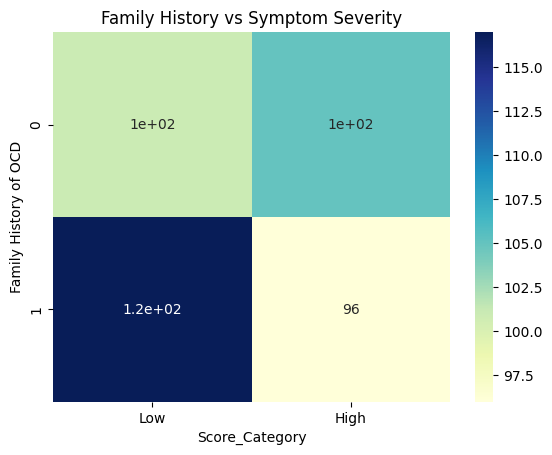

In [29]:
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

# Contingency table for Family History vs Symptom Severity
contingency_table = pd.crosstab(filtered_df['Family History of OCD'], filtered_df['Score_Category'])

# Perform chi-square test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# Print the chi-square test result
print(f"Chi-Square Test Statistic: {chi2}, p-value: {p}")

# Visualize the relationship using a heatmap
sns.heatmap(contingency_table, annot=True, cmap="YlGnBu")
plt.title('Family History vs Symptom Severity')
plt.show()

The Chi-Square test statistic (1.23) is relatively low indicating a weaker association.  
Since the p-value is greater than 0.05, there is no statistically significant association between having a family history of OCD and the severity of symptoms (whether low or high).

3. Below, we try to evaluate the corelation between Age and Total_Score.

In [30]:
# Calculate the Pearson correlation coefficient
correlation_coefficient = filtered_df['Age'].corr(filtered_df['Total_Score'])
print(f'Pearson correlation coefficient between Age and Total_Score: {correlation_coefficient:.2f}')

# Create a scatter plot to show the relationship
fig1 = px.scatter(filtered_df, x='Age', y='Total_Score', 
                 title='Scatter Plot of Age vs Total Score',
                 labels={'Age': 'Age', 'Total_Score': 'OCD Severity (Y-BOCS Total Score)'},
                 trendline='ols')  # Add a trendline to visualize the linear relationship

# Show the figure
fig1.show()

Pearson correlation coefficient between Age and Total_Score: 0.07


4. What is the correlation between the duration of symptoms and OCD severity?

In [31]:
# Calculate the Pearson correlation coefficient
correlation_coefficient = filtered_df['Duration of Symptoms (months)'].corr(filtered_df['Total_Score'])
print(f'Pearson correlation coefficient between Duration of symptoms and Total_Score: {correlation_coefficient:.2f}')

# Create a scatterplot
fig5 = px.scatter(df, x='Duration of Symptoms (months)', y='Total_Score', 
                  title='Relationship between Duration of Symptoms and OCD Severity',
                  labels={'Duration of Symptoms (months)': 'Duration of Symptoms (months)', 'Total_Score': 'OCD Severity (Y-BOCS Total Score)'}, 
                  trendline='ols')
fig5.show()

Pearson correlation coefficient between Duration of symptoms and Total_Score: 0.03


5. How are Age and Duration of Symptoms related?

In [32]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Scatter plot with regression line
def plot_age_duration_relation(filtered_df):
    X = filtered_df[['Age']]
    y = filtered_df['Duration of Symptoms (months)']

    # Fit linear regression model
    reg = LinearRegression().fit(X, y)
    y_pred = reg.predict(X)

    # Create scatter plot with linear regression line
    fig = px.scatter(filtered_df, x='Age', y='Duration of Symptoms (months)', 
                     trendline="ols", title="Age vs Duration of Symptoms",
                     labels={'Age': 'Age (Years)', 'Duration of Symptoms (months)': 'Duration (Months)'})
    
    fig.add_trace(go.Scatter(x=filtered_df['Age'], y=y_pred, mode='lines', name='Regression Line'))
    fig.show()

# Usage
plot_age_duration_relation(filtered_df)

### Predictive Analytics: Classification

We choose to predict the severity of OCD symptoms (by predicting Score_Category). "Score_Category_Encoded" is the target class. It is binary.
Going by the literature review and subject matter expertise within the team, features that are deemed to be necessary to create a prediction model are: Age, Gender, Family History of OCD, Duration of Symptoms, Depression Diagnosis, Anxiety Diagnosis, Type of Obsession, Type of Compulsion. 

Prediction task: Build a model that predicts severity of OCD symptoms by assigning a category to the Y-BOCS scores of patients.

In [33]:
# Drop columns that are not required
new_df = filtered_df.drop(columns=['Total_Score', 'Score_Category', 'Age Group', 'Condition', 'Cluster', 'Gender'])

# View the concise dataframe
new_df.head()

,Age,Family History of OCD,Duration of Symptoms (months),Depression Diagnosis,Anxiety Diagnosis,Gender_Boolean,Obsession Type_Contamination,Obsession Type_Harm-related,Obsession Type_Hoarding,Obsession Type_Religious,Obsession Type_Symmetry,Compulsion Type_Checking,Compulsion Type_Counting,Compulsion Type_Ordering,Compulsion Type_Praying,Compulsion Type_Washing,Score_Category_Encoded
0,0.245614,0,0.841880,1,1,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
1,0.684211,0,0.713675,0,0,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
2,0.350877,0,0.444444,1,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
3,0.964912,0,0.970085,1,1,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1
4,0.842105,0,0.286325,0,1,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1


In [34]:
# Convert pd df into numpy array
new_df_na = new_df.values
print(new_df_na)

[[0.24561404 0.         0.84188034 ... 0.         0.         0.        ]
 [0.68421053 0.         0.71367521 ... 0.         0.         1.        ]
 [0.35087719 0.         0.44444444 ... 1.         0.         0.        ]
 ...
 [0.70175439 1.         0.06837607 ... 1.         0.         1.        ]
 [0.38596491 1.         0.4017094  ... 0.         0.         1.        ]
 [0.33333333 1.         0.87179487 ... 0.         1.         0.        ]]


Checking for class imbalance

In [35]:
# Plot histogram for target class
fig = px.histogram(new_df, x='Score_Category_Encoded', nbins=2, 
                   title='Distribution of Score Category (Encoded)',
                   labels={'Score_Category_Encoded': 'Score Category (Encoded)'},
                   text_auto=True
)

# Update the layout for better visualization
fig.update_layout(
    xaxis_title='Score Category (Encoded)',
    yaxis_title='Count',
    bargap=0.2,
    showlegend=False
)

# Show the plot
fig.show()

While there doesn't seem to be a significant class imbalance, we still choose to perform Stratified train-test partitioning to ensure that the distribution of classes in both the training and testing sets remains similar to the original dataset.

In [36]:
from sklearn.model_selection import train_test_split

# Separate features (x) and target variable (y)
x = new_df_na[:, :-1]  # Features
y = new_df_na[:, -1].astype(float)  # Target variable

import numpy as np
RANDOM_SEED = 2000
np.random.seed(RANDOM_SEED)

# Normalize the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_normalized = scaler.fit_transform(x)

# Create splits from the normalized dataset.
x_train_norm, x_test_norm, y_train, y_test = train_test_split(x_normalized,
                                                              y,
                                                              test_size=0.2,
                                                              random_state=RANDOM_SEED)


In [37]:
# Models used
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [38]:
models = {
    "DT_1": DecisionTreeClassifier(max_depth=3),
    "DT_2": DecisionTreeClassifier(max_depth=5),
    "RF_1": RandomForestClassifier(n_estimators=10, max_depth=3),
    "RF_2": RandomForestClassifier(n_estimators=100, max_depth=5),
    "KNN_1": KNeighborsClassifier(n_neighbors=3),
    "KNN_2": KNeighborsClassifier(n_neighbors=7),
    "SVM_1": SVC(kernel='rbf'),
    "SVM_2": SVC(kernel='linear'),
    "SVM_3": SVC(kernel='sigmoid'),
    "SVM_4": SVC(kernel='linear', class_weight= {0:2, 1:1}),
    "LR_1": LogisticRegression(),
    "LR_2": LogisticRegression(class_weight= "balanced"),
    "LR_3": LogisticRegression(class_weight= {0:2, 1:1})
}

# Iterate over the dictionary as follows:
for name, classifier in models.items():
    print("The name of the classifier is:", name, " and it is a sklearn object:", classifier)

The name of the classifier is: DT_1  and it is a sklearn object: DecisionTreeClassifier(max_depth=3)
The name of the classifier is: DT_2  and it is a sklearn object: DecisionTreeClassifier(max_depth=5)
The name of the classifier is: RF_1  and it is a sklearn object: RandomForestClassifier(max_depth=3, n_estimators=10)
The name of the classifier is: RF_2  and it is a sklearn object: RandomForestClassifier(max_depth=5)
The name of the classifier is: KNN_1  and it is a sklearn object: KNeighborsClassifier(n_neighbors=3)
The name of the classifier is: KNN_2  and it is a sklearn object: KNeighborsClassifier(n_neighbors=7)
The name of the classifier is: SVM_1  and it is a sklearn object: SVC()
The name of the classifier is: SVM_2  and it is a sklearn object: SVC(kernel='linear')
The name of the classifier is: SVM_3  and it is a sklearn object: SVC(kernel='sigmoid')
The name of the classifier is: SVM_4  and it is a sklearn object: SVC(class_weight={0: 2, 1: 1}, kernel='linear')
The name of th

In [39]:
# Individual performance metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import time

# Pandas dataframe to store results of each variable on the 10 classifiers
results = pd.DataFrame({
                        "classifier_name": [],
                        "training_time": [],
                        "prediction_time": [],
                        "accuracy": [],
                        "precision": [],
                        "recall": [],
                        "f1": []
                        })

In [40]:
# Apply the classifier in each dataset
for name, classifier in models.items():

    # Start measuring the training time
    t_start = time.time()
    # The code below applies the specific classifier from the loop on the data
    classifier.fit(x_train_norm,y_train)
    # Stop measuring training time
    t_end = time.time()
    # Calculate Variable of interest `training_time`
    training_time = t_end - t_start
    #######

    # Start measuring the prediction time
    t_start = time.time()
    # Predict on test set
    y_predicted = classifier.predict(x_test_norm)
    # Stop measuring prediction time
    t_end = time.time()
    # Calculate Variable of interest `prediction_time`
    prediction_time = t_end - t_start
    #######


    # Get performance metrics
    accuracy_result = accuracy_score(y_test, y_predicted)
    precision_result = precision_score(y_test, y_predicted, zero_division=0)
    recall_result = recall_score(y_test, y_predicted)
    f1_result = f1_score(y_test, y_predicted)
    #######


    #### Generate the results to populate the pandas.DataFrame
    this_result = pd.DataFrame({
                    "classifier_name": [name],
                    "training_time": [training_time],
                    "prediction_time": [prediction_time],
                    "accuracy": [accuracy_result],
                    "precision": [precision_result],
                    "recall": [recall_result],
                    "f1": [f1_result]
                    })
    # Append to the main dataframe with the results
    results = pd.concat([results, this_result], axis=0, ignore_index=True)

results

,classifier_name,training_time,prediction_time,accuracy,precision,recall,f1
0,DT_1,0.000000,0.000000,0.630952,0.673913,0.659574,0.666667
1,DT_2,0.000000,0.000000,0.630952,0.653846,0.723404,0.686869
2,RF_1,0.000000,0.015452,0.559524,0.600000,0.638298,0.618557
3,RF_2,0.083184,0.018367,0.642857,0.666667,0.723404,0.693878
4,KNN_1,0.001013,0.008991,0.523810,0.574468,0.574468,0.574468
5,KNN_2,0.000999,0.010326,0.559524,0.608696,0.595745,0.602151
6,SVM_1,0.004981,0.001183,0.619048,0.631579,0.765957,0.692308
7,SVM_2,0.002997,0.001002,0.619048,0.666667,0.638298,0.652174
8,SVM_3,0.005146,0.000998,0.595238,0.658537,0.574468,0.613636
9,SVM_4,0.002060,0.000962,0.440476,0.000000,0.000000,0.000000


In [41]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_predicted, zero_division=0)  # Use zero_division=1 if needed
print(report)

              precision    recall  f1-score   support

         0.0       0.45      0.89      0.59        37
         1.0       0.60      0.13      0.21        47

    accuracy                           0.46        84
   macro avg       0.52      0.51      0.40        84
weighted avg       0.53      0.46      0.38        84

